Projeto 1

Importando bibliotecas (não esquecer de instalá-las com pip intall)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

1.	Juntar todas as imagens em uma única

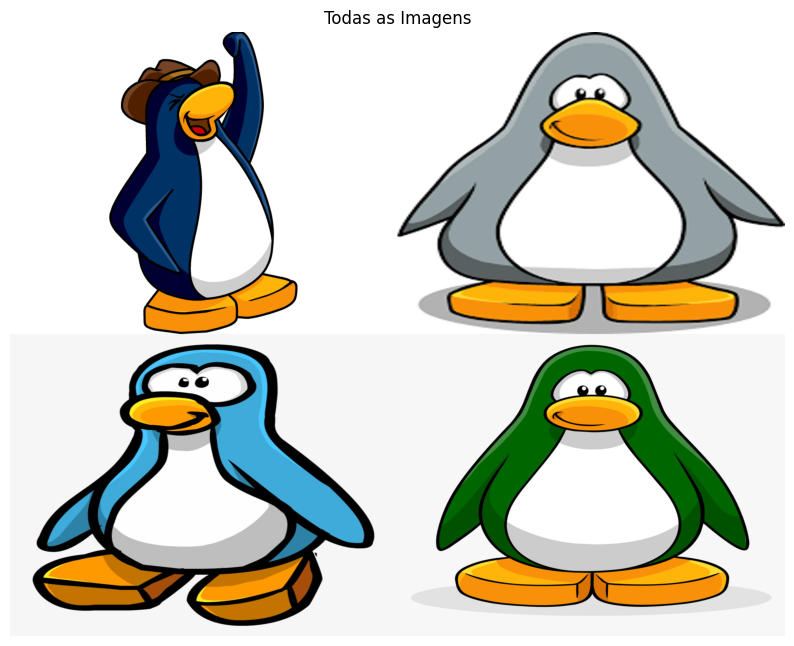

In [9]:
# Criar uma grade 2x2
img_top = np.hstack([np.array(imgs_resized[0]), np.array(imgs_resized[1])])
img_bottom = np.hstack([np.array(imgs_resized[2]), np.array(imgs_resized[3])])

# Unir as duas linhas
img_final = np.vstack([img_top, img_bottom])

# Exibir a imagem final
plt.figure(figsize=(10, 10))
plt.title('Todas as Imagens')
plt.imshow(img_final)
plt.axis('off')
plt.show()



2.	Trocar as cores (mudar a cor dos pinguins para qualquer outra)

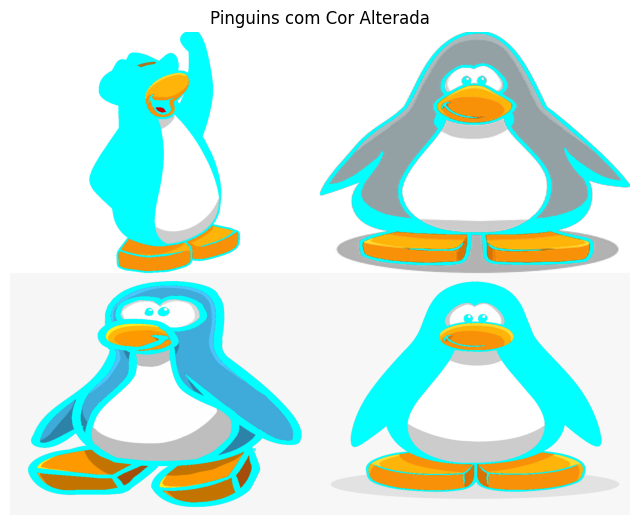

In [12]:
def trocar_cor_numpy(img, nova_cor=[255, 0, 255]):
    """
    Troca a cor dos pinguins na imagem sem usar OpenCV.

    Parâmetros:
    - img: imagem no formato NumPy (RGB).
    - nova_cor: cor para substituir os pinguins (RGB). Exemplo:
        - [255, 0, 0] -> Vermelho
        - [0, 255, 0] -> Verde
        - [0, 0, 255] -> Azul
        - [255, 0, 255] -> Roxo

    Retorna:
    - Imagem modificada.
    """
    # Criar uma cópia para não alterar a original
    img_modificada = img.copy()

    # Definir um intervalo para detectar os pinguins (tons escuros)
    limite_inferior = np.array([0, 0, 0])     # Preto
    limite_superior = np.array([150, 150, 150])  # Cinza escuro

    # Criar máscara para detectar os pinguins (áreas escuras)
    mascara = np.all((img >= limite_inferior) & (img <= limite_superior), axis=-1)

    # Aplicar a nova cor apenas onde há pinguins
    img_modificada[mascara] = nova_cor

    return img_modificada

# Aplicar a função na imagem final
img_colorida = trocar_cor_numpy(img_final, nova_cor=[0, 255, 255])  # Aqui você escolhe a cor

# Exibir a nova imagem
plt.figure(figsize=(8, 8))
plt.title('Pinguins com Cor Alterada')
plt.imshow(img_colorida)
plt.axis('off')
plt.show()

3.	Aplicar o espelhamento

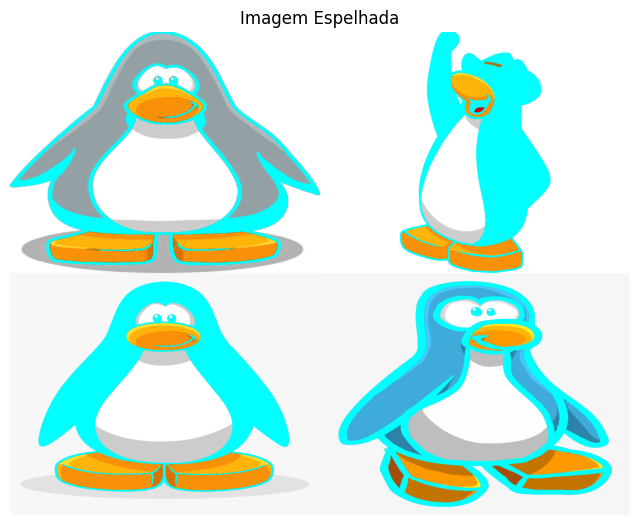

In [13]:
# Espelhamento Horizontal (Inverte esquerda-direita)
img_espelhada = np.flip(img_colorida, axis=1)

# Exibir a imagem espelhada
plt.figure(figsize=(8, 8))
plt.title('Imagem Espelhada')
plt.imshow(img_espelhada)
plt.axis('off')
plt.show()

4.	Recortar seu pinguim favorito (descarte os outros, deixando apenas um na imagem).

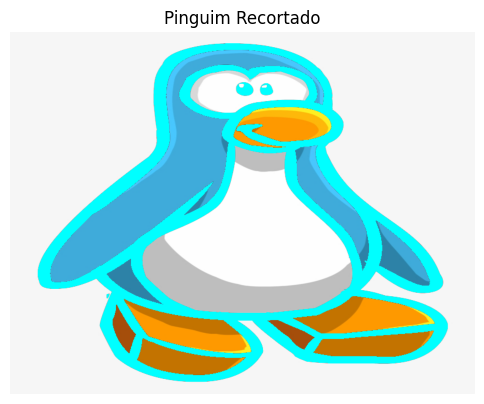

In [15]:
# Definir coordenadas do recorte (Ajuste conforme necessário)
altura, largura, _ = img_espelhada.shape  # Tamanho total da imagem

# Exemplo: Recortar o pinguim inferior direito
y_inicial, y_final = altura // 2, altura
x_inicial, x_final = largura // 2, largura

# Aplicar o recorte
img_cortada = img_espelhada[y_inicial:y_final, x_inicial:x_final]

# Exibir a imagem recortada
plt.figure(figsize=(6, 6))
plt.title('Pinguim Recortado')
plt.imshow(img_cortada)
plt.axis('off')
plt.show()


5.	Faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold.  (Justifique a escolha do threshold)

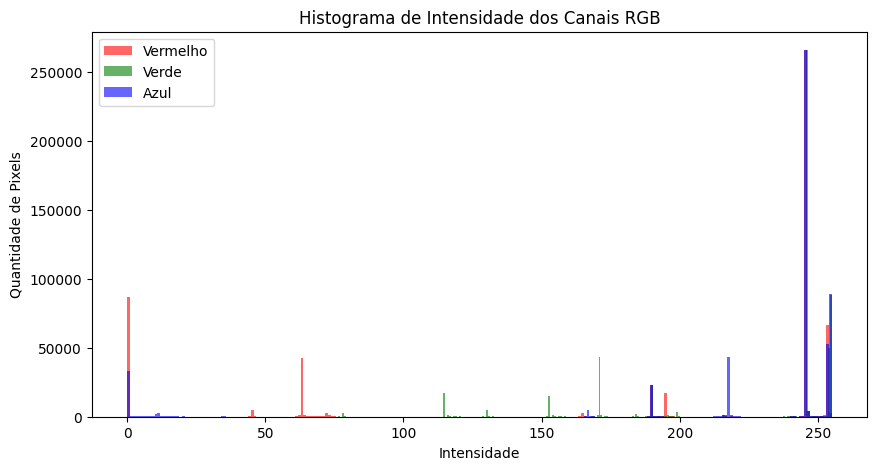

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Separar os canais de cor da imagem recortada
r, g, b = img_cortada[:,:,0], img_cortada[:,:,1], img_cortada[:,:,2]

# Criar o histograma para cada canal
plt.figure(figsize=(10, 5))
plt.hist(r.ravel(), bins=256, color='red', alpha=0.6, label='Vermelho')
plt.hist(g.ravel(), bins=256, color='green', alpha=0.6, label='Verde')
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.6, label='Azul')

# Configurações do gráfico
plt.title('Histograma de Intensidade dos Canais RGB')
plt.xlabel('Intensidade')
plt.ylabel('Quantidade de Pixels')
plt.legend()
plt.show()



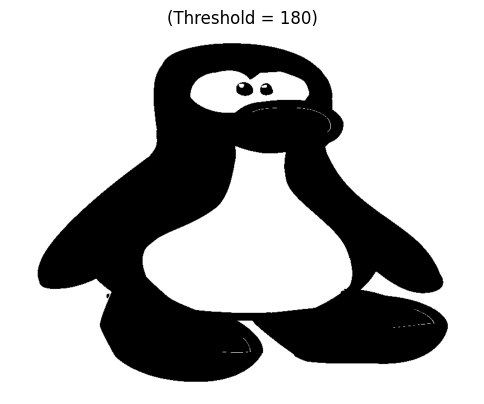

In [25]:
# Definir um valor de threshold (exemplo: 180)
threshold = 180

# Converter a imagem para tons de cinza
img_gray = np.mean(img_cortada, axis=-1)  # Média dos canais RGB

# Aplicar a limiarização (pixels abaixo do threshold ficam de uma cor)
img_threshold = np.where(img_gray < threshold, 0, 255).astype(np.uint8)

# Exibir a imagem binarizada
plt.figure(figsize=(6, 6))
plt.title(f'(Threshold = {threshold})')
plt.imshow(img_threshold, cmap='gray')
plt.axis('off')
plt.show()

6.	Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita (por exemplo: Azul)

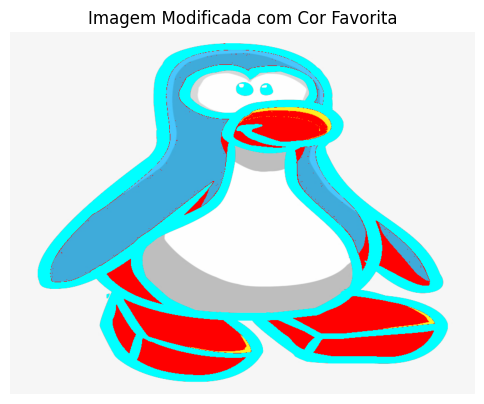

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o threshold (ajuste conforme necessário)
threshold = 150

# Criar a versão em escala de cinza para comparar com o threshold
img_gray = np.mean(img_cortada, axis=-1)

# Definir a cor favorita (Exemplo: Azul)
cor_favorita = np.array([255, 0, 0])  # RGB para vermelho

# Criar uma nova imagem colorida
img_modificada = img_cortada.copy()

# Aplicar a conversão: Substituir pixels abaixo do threshold pela cor escolhida
mascara = img_gray < threshold  # Identifica pixels abaixo do threshold
img_modificada[mascara] = cor_favorita  # Aplica a nova cor

# Exibir a imagem modificada
plt.figure(figsize=(6, 6))
plt.title('Imagem Modificada com Cor Favorita')
plt.imshow(img_modificada)
plt.axis('off')
plt.show()
